In [2]:
import models
from models import model, create_cd_cluster, cd_diagram, bt_plot
from dataset_management import get_dataset, convert_to_autorank
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

algorithm="algorithm";benchmark="bench_prior";seed="seed";budget="used_fidelity"
ds=get_dataset(dataset_name="fig5_full_anon")
thesis_1 = {"priors":["bad"],"slices":[5,10,15,20]};thesis_1["data"]=ds.loc[ds["prior"].isin(thesis_1["priors"])]

✅ Loading data done                                                                                 


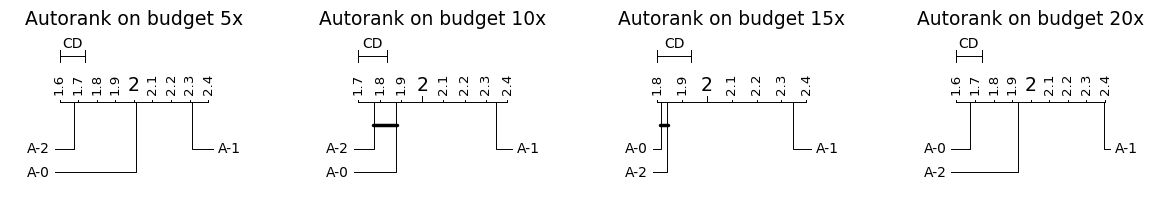

In [2]:
# First plot: Autorank on data AT 5, AT 10, AT 15, AT 20x budget given the raw value
plot_1=bt_plot(slices=thesis_1["slices"],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_1.change_row(0,None,globality=False,loss="normalized_regret",titles=["Autorank on budget 5x","Autorank on budget 10x","Autorank on budget 15x","Autorank on budget 20x"])
fig=plt.figure(plot_1.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/1_anon")

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates


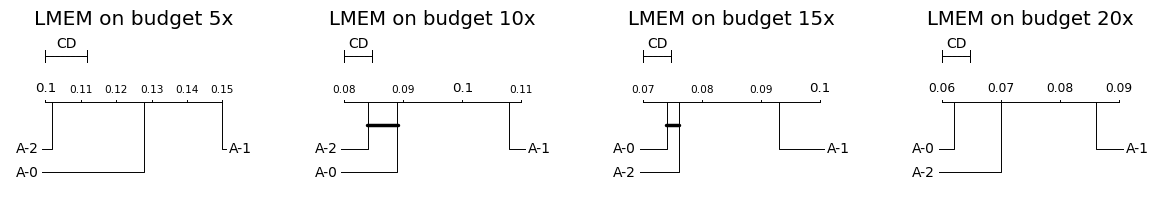

In [3]:
# Second plot: LMEM on same data
plot_2=bt_plot(slices=thesis_1["slices"],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_2.change_row(0,f"{algorithm}+(1|{benchmark})",globality=False,loss="normalized_regret",titles=["LMEM on budget 5x","LMEM on budget 10x","LMEM on budget 15x","LMEM on budget 20x"])
fig=plt.figure(plot_2.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/2_anon")

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates


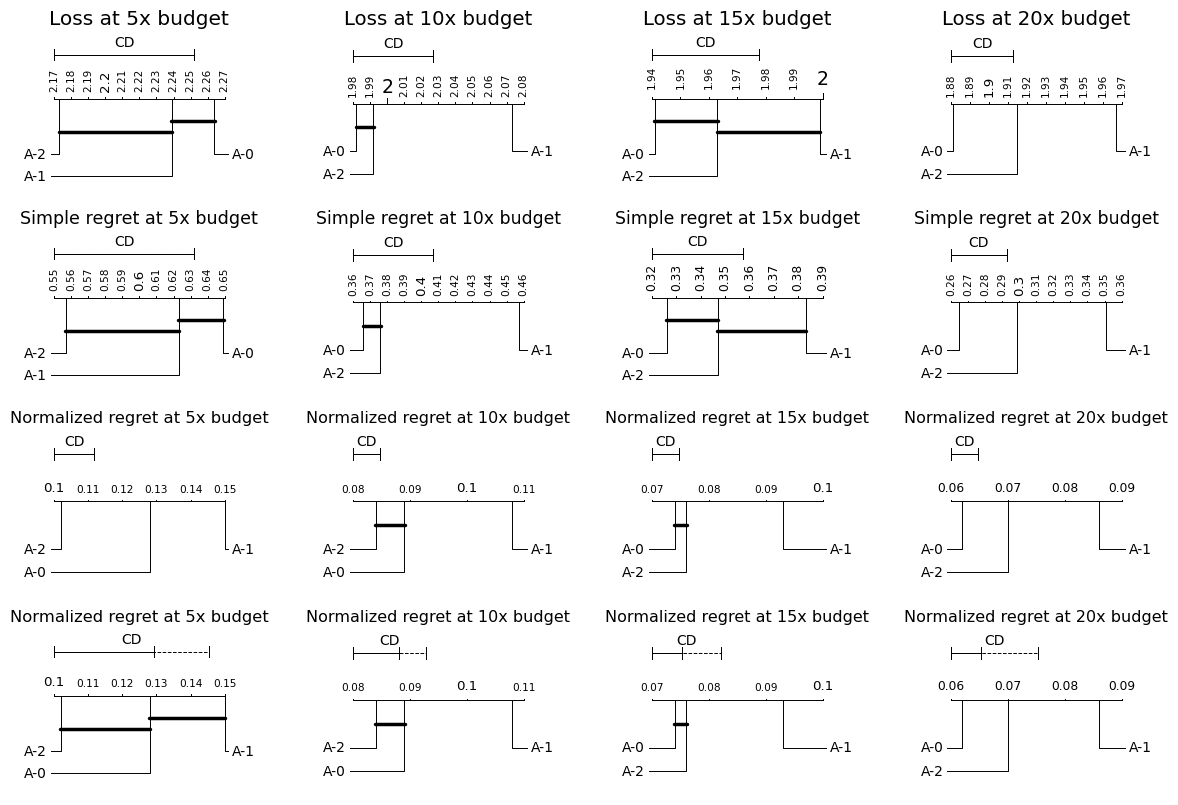

In [4]:
# Third plot: LMEM on same data but with other effects and metrics
plot_3=bt_plot(slices=thesis_1["slices"],rows=4,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_3.change_row(0,f"{algorithm}+(1|{benchmark})",globality=False,loss="value",titles=["Loss at 5x budget","Loss at 10x budget","Loss at 15x budget","Loss at 20x budget"])
plot_3.change_row(1,f"{algorithm}+{algorithm}:{benchmark}",globality=False,loss="simple_regret",titles=["Simple regret at 5x budget","Simple regret at 10x budget","Simple regret at 15x budget","Simple regret at 20x budget"])
plot_3.change_row(2,f"{algorithm}+{algorithm}:{benchmark}",globality=False,loss="normalized_regret",titles=["Normalized regret at 5x budget","Normalized regret at 10x budget","Normalized regret at 15x budget","Normalized regret at 20x budget"])
plot_3.change_row(3,f"{algorithm}+({algorithm}|{benchmark})",globality=False,loss="normalized_regret",titles=["Normalized regret at 5x budget","Normalized regret at 10x budget","Normalized regret at 15x budget","Normalized regret at 20x budget"])
fig=plt.figure(plot_3.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/3_anon")


c:\Users\Amega\Git\significance_analysis\.venv_3_10_0\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


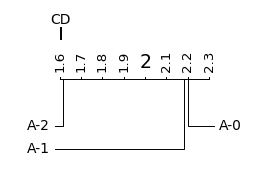

In [5]:
# Fourth plot: Autorank on data 0-24
plot_4=bt_plot(slices=[[0,20]],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_4.change_row(0,None,globality=False,loss="normalized_regret",titles=[""])
fig=plt.figure(plot_4.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/4_anon")

P-values adjusted by tukey method for family of 3 estimates


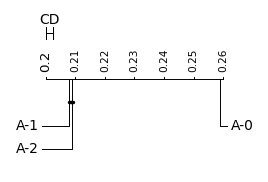

In [6]:
# Fifth plot: LMEM on data 0-24, model with budget as effect, normalized regret
plot_5=bt_plot(slices=[[0,20]],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_5.change_row(0,f"{algorithm}+(1|{benchmark})",globality=False,loss="normalized_regret",titles=[""])
fig=plt.figure(plot_5.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/5_anon")

P-values adjusted by tukey method for family of 3 estimates


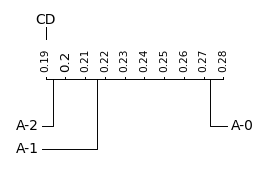

In [7]:
plot_5_2=bt_plot(slices=[[0,20]],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_5_2.change_row(0,f"{algorithm}+{algorithm}:{budget}+(1|{benchmark})",globality=False,loss="normalized_regret",titles=[""])
fig=plt.figure(plot_5_2.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/5_anon_budget")

P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates
P-values adjusted by tukey method for family of 3 estimates


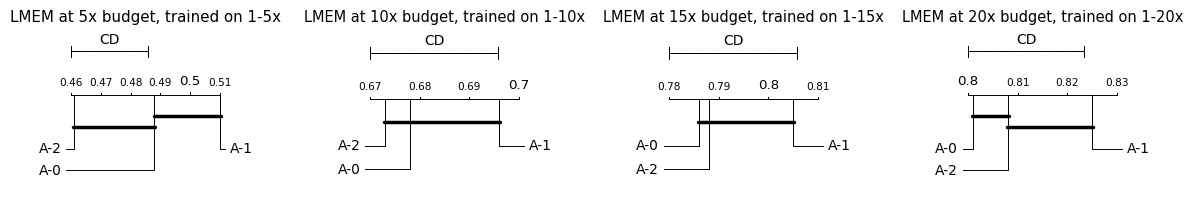

In [8]:
# Sixth plot: LMEM trained on 0-24, with slices 0-6, 6-12, 12-18, 18-24
plot_6=bt_plot(slices=[5,10,15,20],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_6.change_row(0,f"{algorithm}+{budget}+(1|{benchmark})",globality=True,loss="normalized_regret",titles=["LMEM at 5x budget, trained on 1-5x","LMEM at 10x budget, trained on 1-10x","LMEM at 15x budget, trained on 1-15x","LMEM at 20x budget, trained on 1-20x"])
fig=plt.figure(plot_6.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/6_anon")

P-values adjusted by tukey method for family of 3 estimates


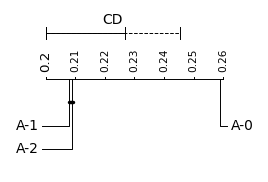

In [4]:
# Background plot CD-Diagram example
plot_cd=bt_plot(slices=[[0,20]],rows=1,dataset=thesis_1["data"],algorithm_var=algorithm,budget_var=budget)
plot_cd.change_row(0,f"{algorithm}+({algorithm}|{benchmark})",globality=False,loss="normalized_regret",titles=[""])
fig=plt.figure(plot_cd.show())
plt.savefig(dpi=300,pad_inches=0, bbox_inches="tight",fname="img/cd_example")